In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [2]:
spark = SparkSession.builder.appName('deep_learning').getOrCreate()

In [4]:
# Load the dl_data.csv into hadoop in the named folder 'user1'

df = spark.read.csv('/user1/fer2013.csv', header=True, inferSchema=True)

In [5]:
# Display the structure of schema
df.printSchema()

root
 |-- emotion: integer (nullable = true)
 |-- pixels: string (nullable = true)
 |-- Usage: string (nullable = true)



In [6]:
df.show(5)

+-------+--------------------+--------+
|emotion|              pixels|   Usage|
+-------+--------------------+--------+
|      0|70 80 82 72 58 58...|Training|
|      0|151 150 147 155 1...|Training|
|      2|231 212 156 164 1...|Training|
|      4|24 32 36 30 32 23...|Training|
|      6|4 0 0 0 0 0 0 0 0...|Training|
+-------+--------------------+--------+
only showing top 5 rows



In [7]:
# print of data shape
print('Shape of dataset:',(df.count(),len(df.columns)))

Shape of dataset: (35887, 3)


In [8]:
df.describe().show()

+-------+------------------+--------------------+-----------+
|summary|           emotion|              pixels|      Usage|
+-------+------------------+--------------------+-----------+
|  count|             35887|               35887|      35887|
|   mean|3.3232646919497313|                null|       null|
| stddev|1.8738187592999593|                null|       null|
|    min|                 0|0 0 0 0 0 0 0 0 0...|PrivateTest|
|    max|                 6|99 99 99 99 101 1...|   Training|
+-------+------------------+--------------------+-----------+



In [9]:
df.columns

['emotion', 'pixels', 'Usage']

In [24]:
uniqe_usages = df.select("Usage").distinct()
uniqe_usages.show()

+-----------+
|      Usage|
+-----------+
|   Training|
| PublicTest|
|PrivateTest|
+-----------+



In [42]:
from pyspark.sql.functions import rand, lit
random_row = df.orderBy(rand()).limit(1)
first_image = random_row.select("pixels").first()[0]


In [43]:
import numpy as np
pixels = [int(pixel) for pixel in first_image.split()]

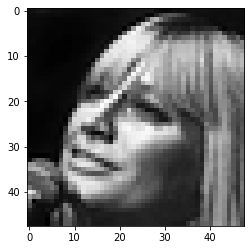

In [44]:
import numpy as np
import matplotlib.pyplot as plt

image = np.array(pixels, dtype=np.uint8).reshape(48,48)

plt.imshow(image, cmap="gray")
plt.show()